In [2]:
%load_ext autoreload
%autoreload 2
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import pandas as pd
import os
import sys
import numpy as np
sys.path.append("../../Code")
import utils
import files as f
import seaborn as sns
import matplotlib.pyplot as plt
import preprocessing as pre
import languages as lang
stopWords = set(stopwords.words('english'))
import profiles

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
guests = pd.read_csv(os.path.join('..','2','nr_restrict_guests.csv'), low_memory=False, index_col=0).drop_duplicates(subset="id", keep="last")
hosts = pd.read_csv(os.path.join('..','2','nr_restrict_hosts.csv'), index_col=0)
hosts = hosts[~hosts.index.isnull()]

In [4]:
len(guests)

96255

In [5]:
len(hosts)

6924

## Load Translated Profiles

In [9]:
trans_guest = pd.read_csv('guest_profile_spell.csv', low_memory=False, index_col=0)
trans_host = pd.read_csv('host_profile_spell.csv',  low_memory=False, index_col=0)

In [10]:
len(trans_host)

6924

In [11]:
len(trans_guest)

96255

In [13]:
trans_guest.description = trans_guest.descriptions 

In [14]:
trans_guest = trans_guest.drop('descriptions', axis=1)

In [16]:
trans_host = trans_host.rename(columns={'about': 'description'})

## Get Topic Vector 

In [20]:
host_empath = profiles.create_empath_dict(trans_host, 'description')

In [22]:
guest_empath = profiles.create_empath_dict(trans_guest, 'description')

In [633]:
text = "Digital startup guy loooovee living in NY interested in music, travel, food and the outdoors. People love the way that I look. I love cats. "

In [634]:
text

'Digital startup guy loooovee living in NY interested in music, travel, food and the outdoors. People love the way that I look. I love cats. '

In [640]:
import nltk
token_text = utils.tokenize(text.lower())
pos_tags =  nltk.pos_tag(token_text)
pos_dict = dict(nltk.Index((value, key) for (key,value) in pos_tags))
from nltk.stem.snowball import SnowballStemmer
ps = SnowballStemmer('english')
stemmed_text = {ps.stem(token) for token in token_text}

In [643]:
print(ps.stem("people"))

peopl


In [641]:
stemmed_text

{'and',
 'cat',
 'digit',
 'food',
 'guy',
 'i',
 'in',
 'interest',
 'live',
 'look',
 'loooove',
 'love',
 'music',
 'ny',
 'outdoor',
 'peopl',
 'startup',
 'that',
 'the',
 'travel',
 'way'}

In [628]:
lex.analyze(token_text)

{'achievement': 0.0,
 'affection': 2.0,
 'aggression': 0.0,
 'air_travel': 1.0,
 'alcohol': 0.0,
 'ancient': 0.0,
 'anger': 0.0,
 'animal': 0.0,
 'anonymity': 0.0,
 'anticipation': 0.0,
 'appearance': 0.0,
 'art': 1.0,
 'attractive': 0.0,
 'banking': 0.0,
 'beach': 0.0,
 'beauty': 0.0,
 'blue_collar_job': 0.0,
 'body': 0.0,
 'breaking': 0.0,
 'business': 0.0,
 'car': 0.0,
 'celebration': 0.0,
 'cheerfulness': 0.0,
 'childish': 0.0,
 'children': 0.0,
 'cleaning': 0.0,
 'clothing': 0.0,
 'cold': 0.0,
 'college': 0.0,
 'communication': 0.0,
 'competing': 0.0,
 'computer': 0.0,
 'confusion': 0.0,
 'contentment': 0.0,
 'cooking': 1.0,
 'crime': 0.0,
 'dance': 1.0,
 'death': 0.0,
 'deception': 0.0,
 'disappointment': 0.0,
 'disgust': 0.0,
 'dispute': 0.0,
 'divine': 0.0,
 'domestic_work': 0.0,
 'dominant_heirarchical': 0.0,
 'dominant_personality': 0.0,
 'driving': 0.0,
 'eating': 1.0,
 'economics': 0.0,
 'emotional': 0.0,
 'envy': 0.0,
 'exasperation': 0.0,
 'exercise': 0.0,
 'exotic': 0.0,

In [612]:
words = np.array(['help', 'office', 'dance', 'money', 'wedding', 'domestic_work',
       'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness',
       'aggression', 'occupation', 'envy', 'anticipation', 'family',
       'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health',
       'pride', 'dispute', 'nervousness', 'government', 'weakness',
       'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty',
       'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach',
       'journalism', 'morning', 'banking', 'social_media', 'exercise',
       'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play',
       'computer', 'college', 'optimism', 'stealing', 'real_estate',
       'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero',
       'business', 'driving', 'pet', 'childish', 'cooking',
       'exasperation', 'religion', 'hipster', 'internet', 'surprise',
       'reading', 'worship', 'leader', 'independence', 'movement', 'body',
       'noise', 'eating', 'medieval', 'zest', 'confusion', 'water',
       'sports', 'death', 'healing', 'legend', 'heroic', 'celebration',
       'restaurant', 'violence', 'programming', 'dominant_heirarchical',
       'military', 'neglect', 'swimming', 'exotic', 'love', 'hiking',
       'communication', 'hearing', 'order', 'sympathy', 'hygiene',
       'weather', 'anonymity', 'trust', 'ancient', 'deception', 'fabric',
       'air_travel', 'fight', 'dominant_personality', 'music', 'vehicle',
       'politeness', 'toy', 'farming', 'meeting', 'war', 'speaking',
       'listen', 'urban', 'shopping', 'disgust', 'fire', 'tool', 'phone',
       'gain', 'sound', 'injury', 'sailing', 'rage', 'science', 'work',
       'appearance', 'valuable', 'warmth', 'youth', 'sadness', 'fun',
       'emotional', 'joy', 'affection', 'traveling', 'fashion',
       'ugliness', 'lust', 'shame', 'torment', 'economics', 'anger',
       'politics', 'ship', 'clothing', 'car', 'strength', 'technology',
       'breaking', 'shape_and_size', 'power', 'white_collar_job',
       'animal', 'party', 'terrorism', 'smell', 'disappointment', 'poor',
       'plant', 'pain', 'beauty', 'timidity', 'philosophy', 'negotiate',
       'negative_emotion', 'cleaning', 'messaging', 'competing', 'law',
       'friends', 'payment', 'achievement', 'alcohol', 'liquid',
       'feminine', 'weapon', 'children', 'monster', 'ocean', 'giving',
       'contentment', 'writing', 'rural', 'positive_emotion', 'musical'])

In [497]:
b = np.nonzero(host_empath[8758313])

In [515]:
def get_profile_descriptives(ids, topic_dic, words):
    return [words[list(np.nonzero(topic_dic[int(i)])[0])] for i in ids]

In [516]:
host_profiles['descriptives'] = get_profile_descriptives(host_profiles['id'].unique(), host_empath, words)

In [518]:
host_profiles['id'].unique()

array(['7118', '7322', '7386', ..., '187872824', '16202209', '190007510'],
      dtype=object)

In [536]:
hosts_empath

NameError: name 'hosts_empath' is not defined

In [533]:
host_profiles[100:259]

,id,about,descriptives
100,434987,"I'm a New York based writer and singer who does a lot of spoken word gigs, and often visits San Francisco. I have 4 pop type books published, I hang out at Double Down, Sidewalk Cafe, and many other spots in the East Village. The Fry Guys and 99 Cents Pizza are right across the street.! My friend Remick, a Brooklyn based comedian, will be your host if I'm in California, the area has an amazing comedy venue scene, some of the top people!","[help, occupation, vacation, computer, cooking, reading, eating, celebration, restaurant, communication, music, speaking, clothing, shape_and_size, party, beauty, messaging, friends, writing, positive_emotion, musical]"
101,449787,Artist. Adventurer. Explorer of all things. Studied abroad and traveled about this lovely world before making New York home. Love the city. Love to leave it but always love coming home. Come for a visit. I'm here to help!,"[family, vacation, attractive, tourism, college, optimism, internet, love, affection, traveling, party, beauty, friends, positive_emotion]"
102,457253,"Digital startup guy living in NY interested in music, travel, food and the outdoors.","[masculine, home, cooking, eating, restaurant, shopping, technology]"
103,478136,"I am a laid back professional in the graphic advertising industry. I am neat, clean, respectful of privacy, do not smoke and own no pets.","[occupation, business, sports, politeness, fire, economics, white_collar_job, smell]"
104,482998,"My wife and I live in the beautiful spot in East Village- Best location in NYC. Our Lovely apartment is clean, spacious, and fully furnished. The subway is steps away and everything you need is accessible, not to mention the café’s ,bakeries, sushi and desserts!!! During our adventures, we enjoy exploring new places, eating delicious food, and seeking out great music.","[wedding, family, vacation, attractive, leisure, tourism, optimism, real_estate, home, business, cooking, eating, death, restaurant, communication, speaking, urban, beauty, friends, achievement, feminine, giving, rural, positive_emotion]"
105,520279,Guy in show biz.,[masculine]
106,523218,"Honest and friendly person. I like simple things in life but with quality. I really love love New York, my family and friends of course. I like to be neat and clean, enjoy traveling, as well, all over the world. Once I heard this phrase: ""the eyes have to travel"", and I apply it to learn and fulfill the spirit visiting new places and meeting interesting people. When I am not exploring New York City or hanging out with my friends I prefer stay relaxing at home or working in my art works, and I put time beside to walk through galleries and museums in the city, there is a lot to see and enjoy in this amazing, incredible place. Welcome to my home : New York City","[office, wedding, domestic_work, occupation, family, vacation, leisure, school, beach, social_media, art, optimism, home, divine, business, pet, movement, death, celebration, love, hearing, trust, politeness, meeting, speaking, listen, work, affection, traveling, strength, party, friends, children, giving, writing, positive_emotion]"
107,556514,"Neat,clean, professional and quiet","[occupation, sports, listen, white_collar_job, timidity]"
108,571952,"I am a 44 year old non-smoking female who currently resides in New York City but was a long-time resident in San Francisco. I'm well-travelled, respectful of people's space and homes (seriously, I will treat it as if it were my own) and love meeting new people. I travel incessantly, am easy to get along with, and can share loads of information with you on things to do and places to go in NYC. I live on the UES in a beautiful one-bedroom apt a mere 2 1/2 blocks from Central Park and within minutes of the Met, Guggenheim, and Jewish museums. This ultra-quiet apt is light-filled (7 windows) and more quiet then you can imagine. I greet all my guests and give them a personal tour of the apt. Also provided are high 

## Get Reviews 

In [401]:
reviews = pd.read_csv(os.path.join('..','2','nr_restrict_reviews.csv'), index_col=0)

In [402]:
hg_profiles = utils.merge_two_dicts(host_empath, guest_empath)

In [403]:
relevant_reviews = reviews[(reviews['recipient_id'].isin(hg_profiles.keys())) & (reviews['reviewer_id'].isin(hg_profiles.keys()))]

In [404]:
len(relevant_reviews)

49707

In [406]:
relevant_reviews = profiles.add_cosine_similarity(relevant_reviews, hg_profiles, version="", id_type="int")

../../Code/profiles.py:11: RuntimeWarning: invalid value encountered in double_scalars
  


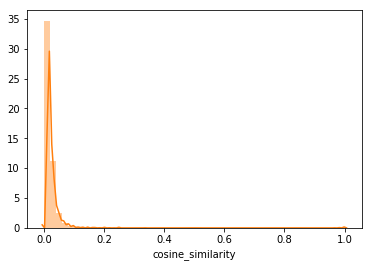

In [414]:
sns.distplot(relevant_reviews[~relevant_reviews['cosine_similarity'].isnull()]['cosine_similarity'])
plt.show()